<a href="https://colab.research.google.com/github/oguzhnsglm/deneme/blob/main/Anemia_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('diagnosed_cbc_data_v4.csv')

In [ ]:
df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


In [ ]:
df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

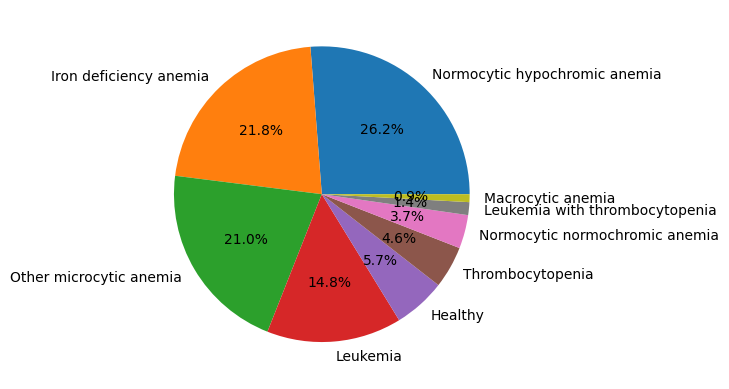

In [ ]:
plt.pie(df['Diagnosis'].value_counts(), labels=df['Diagnosis'].unique(), autopct='%1.1f%%')
plt.show()

In [ ]:
df_encode = pd.get_dummies(data = df,
               columns = ['Diagnosis'],
               drop_first =True,
              dtype='int8')

In [ ]:
df_encode.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,...,PDW,PCT,Diagnosis_Iron deficiency anemia,Diagnosis_Leukemia,Diagnosis_Leukemia with thrombocytopenia,Diagnosis_Macrocytic anemia,Diagnosis_Normocytic hypochromic anemia,Diagnosis_Normocytic normochromic anemia,Diagnosis_Other microcytic anemia,Diagnosis_Thrombocytopenia
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,...,12.5,0.17,0,0,0,0,1,0,0,0
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,...,12.5,0.16,0,0,0,0,1,0,0,0
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,...,14.3,0.14,1,0,0,0,0,0,0,0
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,...,11.3,0.12,1,0,0,0,0,0,0,0
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,...,12.8,0.22,0,0,0,0,1,0,0,0


<Axes: >

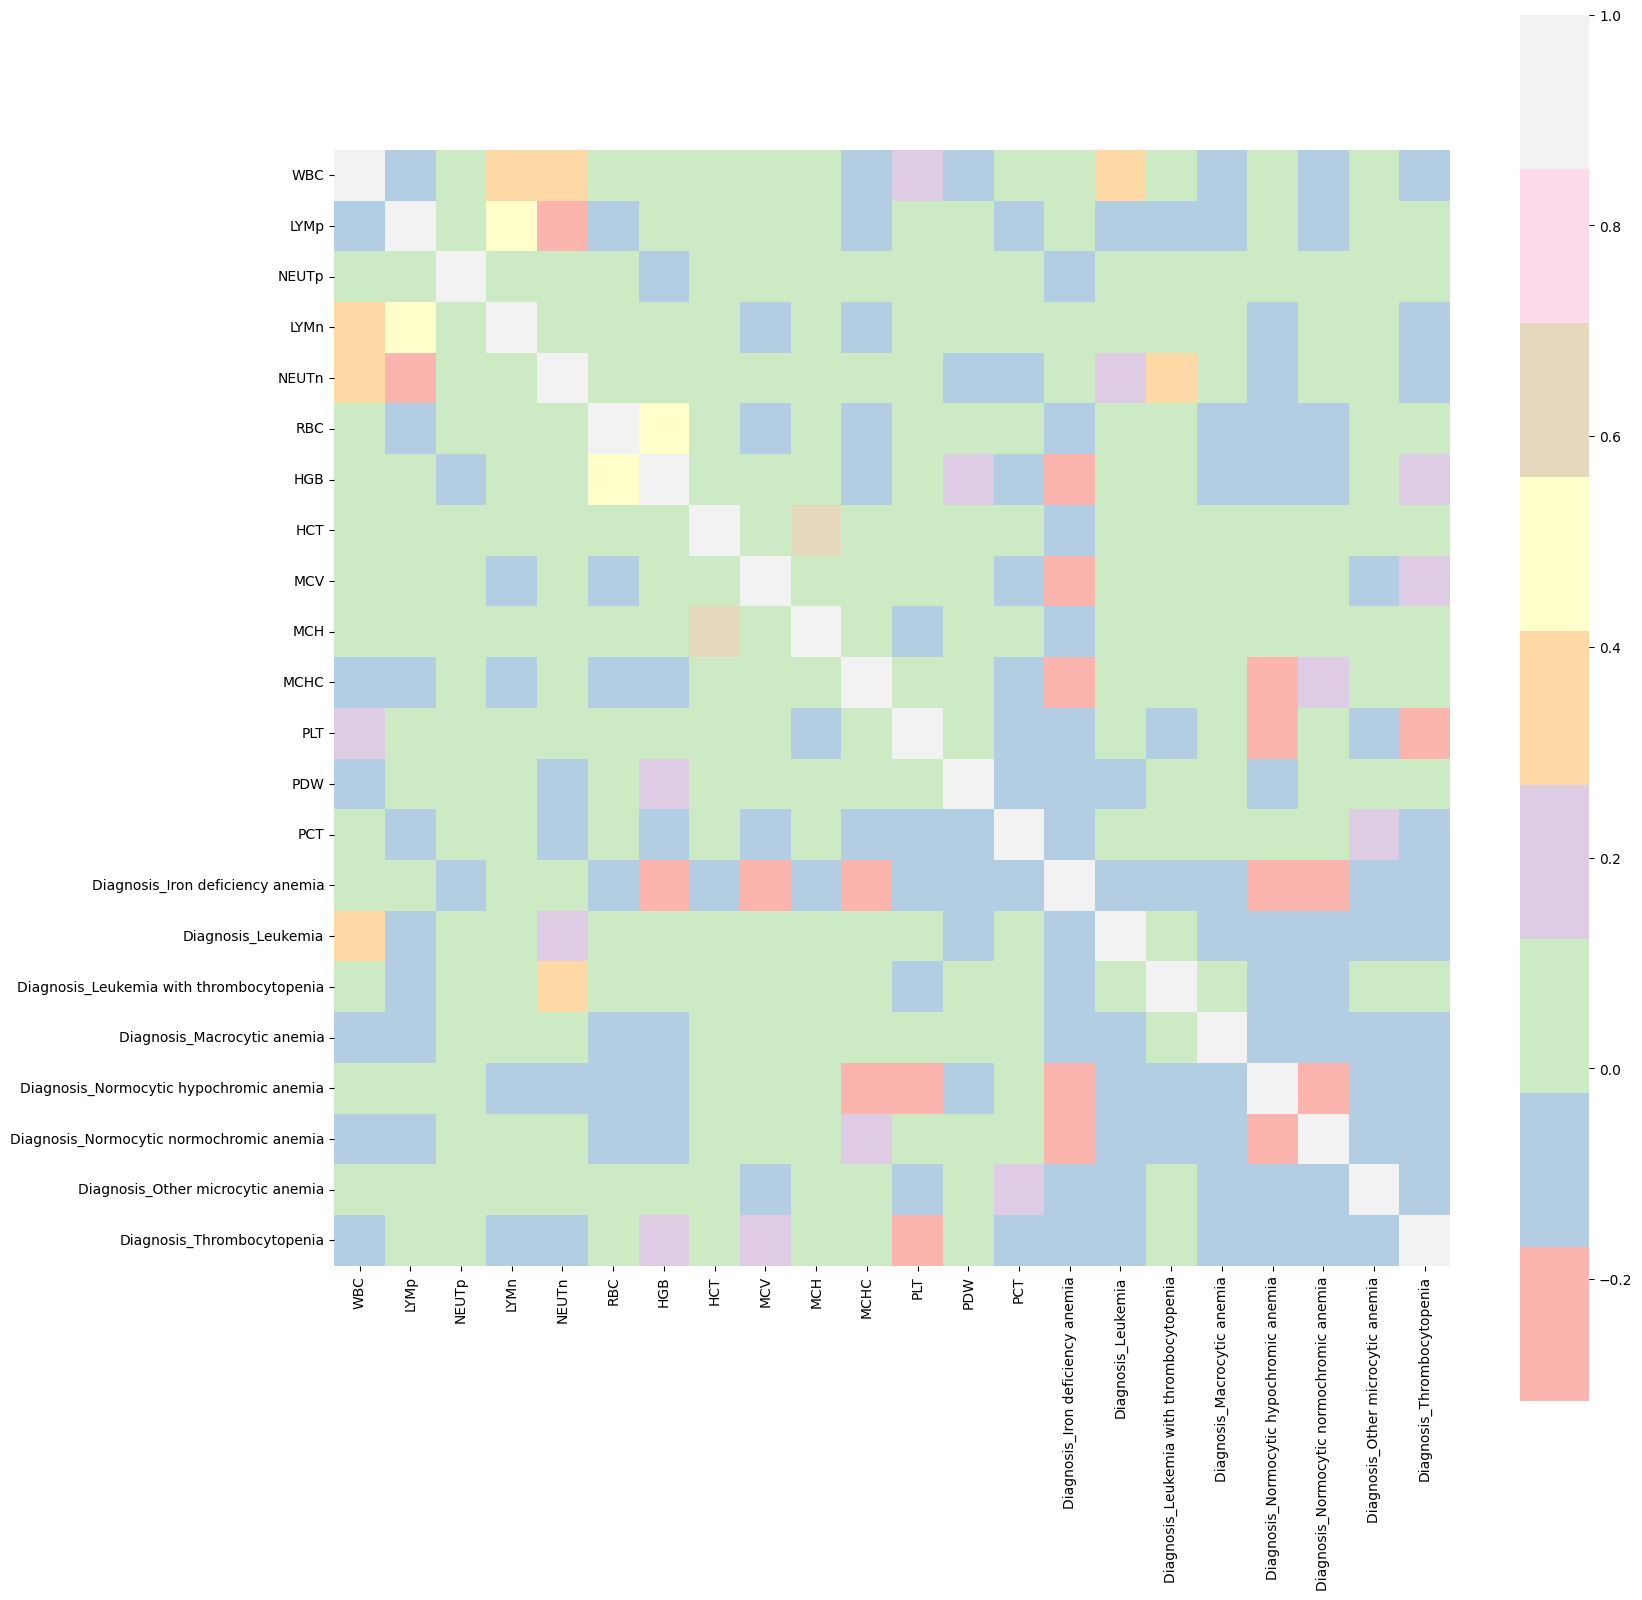

In [ ]:
corrmat = df_encode.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True,fmt='.2f', annot_kws={'size': 10})

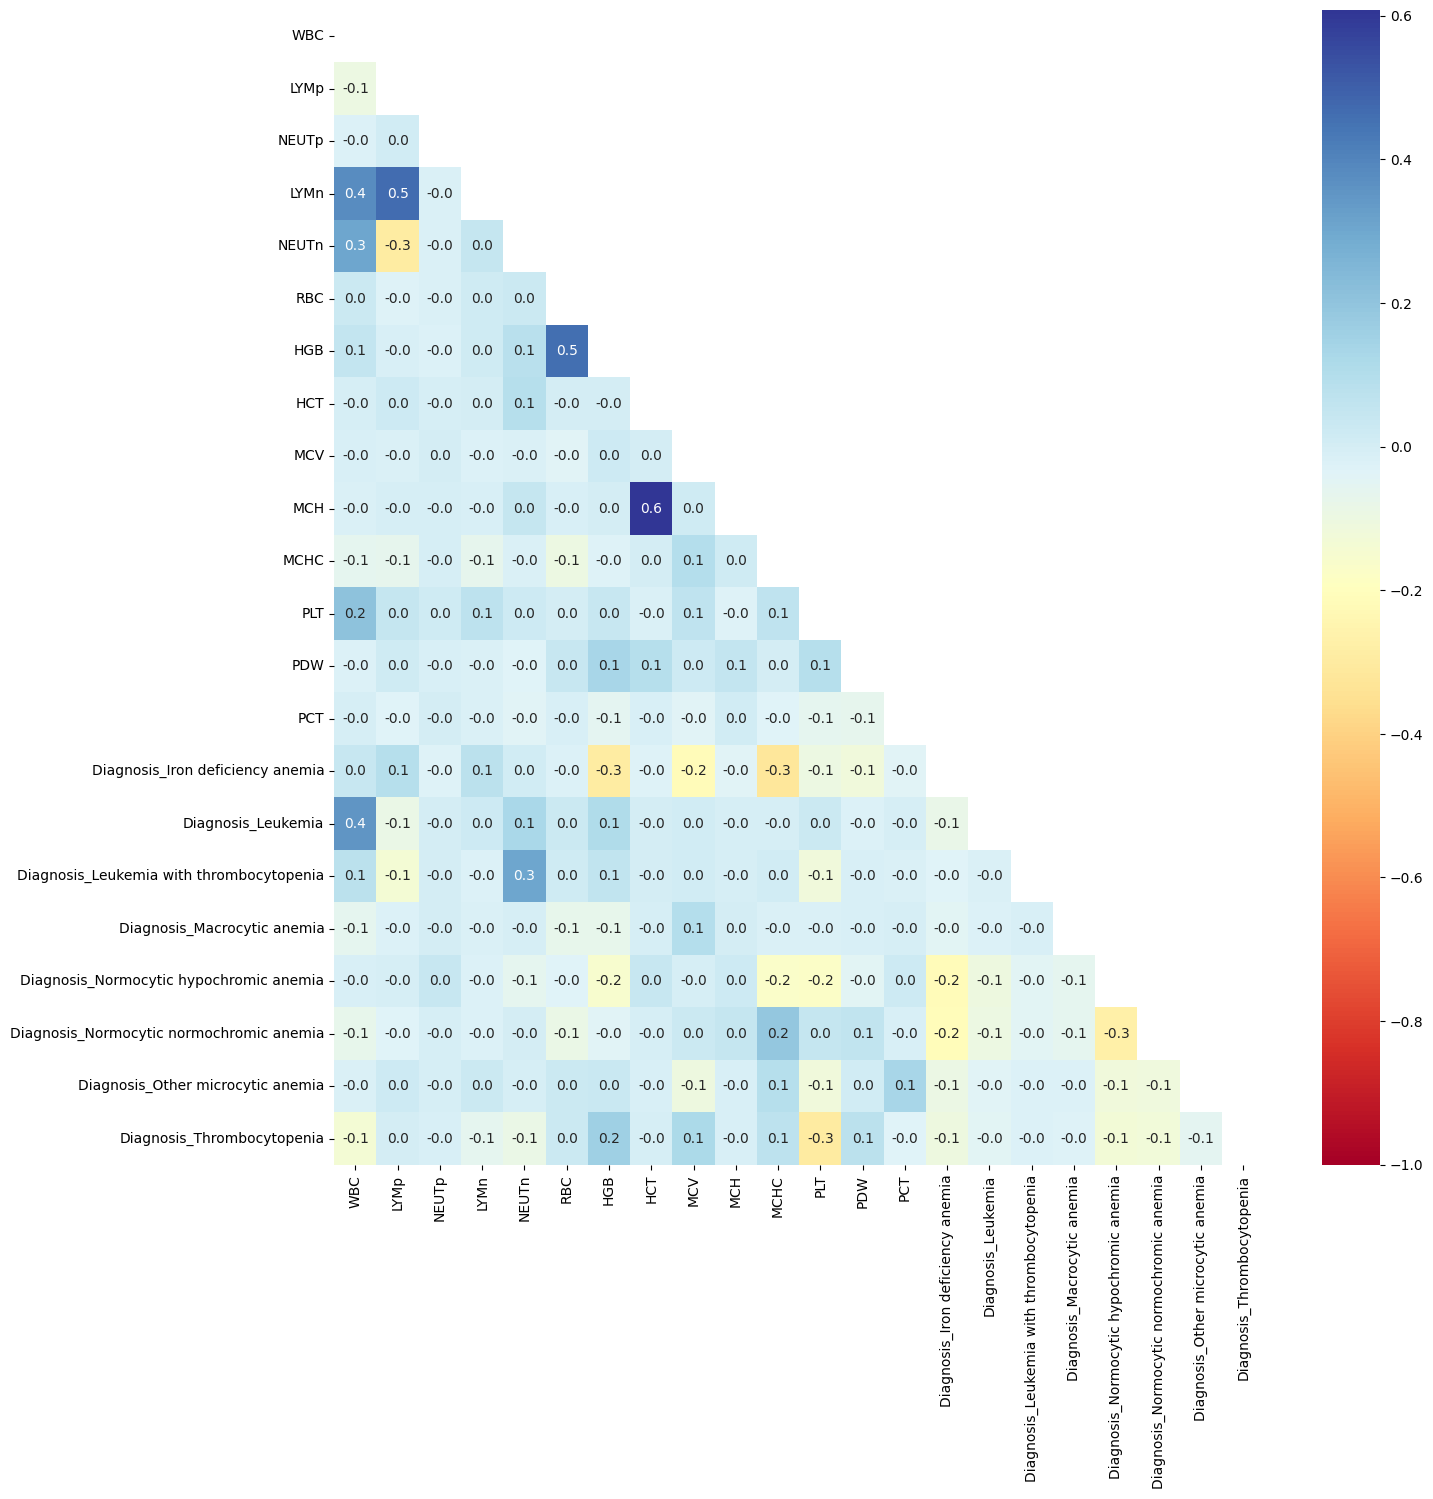

In [ ]:
corr = df_encode.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='RdYlBu', annot=True, mask=mask,fmt='.1f')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=df['Diagnosis']
ref=pd.DataFrame({'Diangnosis_type':y.value_counts().index,'Labels':pd.Series(le.fit_transform(y)).value_counts().index})
ref


,Diangnosis_type,Labels
0,Healthy,0
1,Normocytic hypochromic anemia,5
2,Normocytic normochromic anemia,6
3,Iron deficiency anemia,1
4,Thrombocytopenia,8
5,Other microcytic anemia,7
6,Leukemia,2
7,Macrocytic anemia,4
8,Leukemia with thrombocytopenia,3


In [ ]:
y=le.fit_transform(y)
y=pd.Series(y)
y

0       5
1       5
2       1
3       1
4       5
       ..
1276    0
1277    0
1278    0
1279    0
1280    0
Length: 1281, dtype: int64

In [ ]:
print(cf_matrix)
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)from sklearn import preprocessing
from sklearn.model_selection import train_test_split
X=df.drop(["Diagnosis"],axis=1)

scaler=preprocessing.StandardScaler()
X=scaler.fit_transform(X)

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

Rs = {"RandomForestClassifier()":0,"DecisionTreeClassifier()":0,"XGBClassifier()":0}

for k,v in Rs.items():
    classifier= eval(k)
    classifier.fit(X_train,y_train)
    pred_rfc = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, pred_rfc)
    Rs[k] = accuracy

print("En iyi sınıflandırıcı:{}, skor={}".format(max(Rs, key=Rs.get), max(Rs.values())))

En iyi sınıflandırıcı:XGBClassifier(), skor=0.9883268482490273


In [ ]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)

classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00        67
           6       1.00      1.00      1.00        50
           7       1.00      0.95      0.97        19
           8       0.91      0.91      0.91        11

    accuracy                           0.99       257
   macro avg       0.99      0.98      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[58  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  4  0  0  0  0]
 [ 0  0  0  0  0 67  0  0  0]
 [ 0  0  0  0  0  0 50  0  0]
 [ 0  0  0  0  0  0  0 18  1]
 [ 1  0  0  0  0  0  0  0 10]]
